### Logistic Regression




4. Look in the scikit-learn documentation to research the solver parameter. What is your best option(s) for the particular problem you are trying to solve and the data to be used?

5. Run through steps 2-4 using another solver (from question 5)

6. Which performs better on your in-sample data?

In [18]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from pydataset import data
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop(columns=['Species'])
y = df[['Species']]

In [4]:
def split_my_data(X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 123)
    return x_train, x_test, y_train, y_test

In [5]:
x_train, x_test, y_train, y_test = split_my_data(X,y)

1. Fit the logistic regression classifier to your training sample and transform, i.e. make predictions on the training sample

In [6]:
logit = LogisticRegression(random_state = 123, solver='liblinear', verbose = 1)

Fit the model to the training data

In [7]:
logit.fit(x_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

2. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Print the coefficients and intercept of the model

In [8]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.38421538  1.32718255 -2.11307588 -0.94269552]
 [ 0.43099717 -1.34596217  0.4506587  -1.07117492]
 [-1.517952   -1.52141607  2.26046444  2.12613123]]
Intercept: 
 [ 0.25726194  0.58107381 -0.87235291]


In [9]:
y_pred = logit.predict(x_train)


In [10]:
y_pred_proba = logit.predict_proba(x_train)


Compute the accuracy

In [11]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.95


Create a confusion matrix

In [12]:
labels=sorted(y_train.Species.unique())
pretty_cm = pd.DataFrame(confusion_matrix(y_train,y_pred),index=labels,columns=labels)
print(pretty_cm)

            setosa  versicolor  virginica
setosa          32           0          0
versicolor       0          36          4
virginica        0           1         32


Compute Precision, Recall, F1-score, and Support

In [13]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.90      0.94        40
   virginica       0.89      0.97      0.93        33

    accuracy                           0.95       105
   macro avg       0.95      0.96      0.95       105
weighted avg       0.95      0.95      0.95       105



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [14]:
c_mat=confusion_matrix(y_train,y_pred)

In [21]:
false_positive=c_mat[1,0] + [2,0]
print(false_positive)
true_negative=c_mat[0,0]
print(true_negative)
false_negative=c_mat[1,0]
print(false_negative)
true_positive=c_mat[1,1]
print(true_positive)

[2 0]
32
0
36


In [16]:
#compare this to what was produced from score method
accuracy=((true_negative+true_positive)/len(y_train))
accuracy

0.6476190476190476

In [ ]:
#‘newton-cg’ - 96%, ‘lbfgs’ 96%, ‘liblinear’ 95%, ‘sag’ 96%, ‘saga’ 96%

In [45]:
logit = LogisticRegression(random_state = 123, solver='saga', verbose = 1)
logit.fit(x_train, y_train)

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [46]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 0.3389176   1.28789683 -2.11394313 -0.94719182]
 [ 0.39414558 -1.38109062  0.44038036 -1.02856616]
 [-1.4275007  -1.42459066  2.29209122  2.06589358]]
Intercept: 
 [ 0.63153571  0.89381264 -1.78105991]


In [47]:
y_pred = logit.predict(x_train)

In [48]:
y_pred_proba = logit.predict_proba(x_train)

In [49]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.96


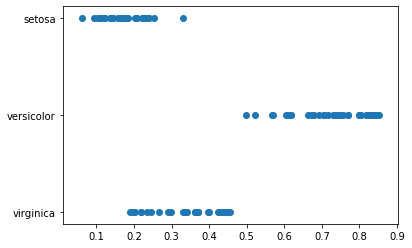

In [50]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

In [20]:
import graphviz

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using entropy as your measure of impurity.

Which performs better on your in-sample data?

Create the Decision Tree Object

In [56]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 123)

Fit the model to the training data

In [57]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

Estimate species

In [54]:
y_pred = clf.predict(x_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

Estimate the probability of a species

In [58]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute the Accuracy
Accuracy: number of correct predictions over the number of total instances that have been evaluated.

In [60]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


Create a confusion matrix
True Positive: number of occurrences where y is true and y is predicted true.
True Negative: number of occurrences where y is false and y is predicted false.
False Positive: number of occurrences where y is false and y is predicted true.
False Negative: number of occurrences where y is true and y is predicted false.

In [61]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [64]:
sorted(y_train.Species.unique())

['setosa', 'versicolor', 'virginica']

In [66]:
y_train.Species.value_counts()

versicolor    40
virginica     33
setosa        32
Name: Species, dtype: int64

In [67]:
import pandas as pd

labels = sorted(y_train.Species.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,2,31


Create a classification report

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.

Support: number of occurrences of each class in where y is true.

In [68]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



Test Model

Compute the accuracy of the model when run on the test data

In [70]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93


In [71]:
from sklearn.datasets import load_iris

iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz

from graphviz import Graph

In [73]:
dot_data = export_graphviz(clf,out_file = None)
graph = graphviz.Source(dot_data)

graph.render('iris_decision_tree', view = True)


'iris_decision_tree.pdf'

Rerun using 'impurity' criterion

In [84]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 123) #gini is the default if you delete criterion

In [77]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [78]:
y_pred = clf.predict(x_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [79]:
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

In [80]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [81]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [82]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [83]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93
